<center><h1>Feature Reduction & Starter Models</h1></center>

In this notebook, we'll try different techniques to reduce the number of dimensions of our data.<br><br>
I'll try the following techniques:
<br>

**1. Feature Selection:**
- Forward Feature Selection.
- Backward Feature Selection.
- Remove High Collinarity Features.
- Recursive Feature Elimination method.
- Nearest Neighbors for Feature Extraction.

**2. Dimensionality Reduction:**
- PCA.
- ICA.
- t-SNE.
- UMAP.
- Random Projection.
- other.

For the starter models, I'll try the following models:<br>
1. Linear Regression.
1. Lasso.
2. Ridge.
3. Elastic Net.
4. SVR.
5. GaussianNB.
6. KNeighborsRegressor.
7. MLP.
8. RandomForestRegressor.
9. ExtraTreeRegressor.
10. GTBM (Sklearn)
11. XGBoost (Stanford).
12. LightGBM (Microsoft).
13. Catboost (Yandex).
14. Average Stacking.
15. Meta layer Stacking.

# Data Overview:
## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm_notebook as tqdm

from util import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read Data:

In [2]:
train = pd.read_csv('../3_Feature Engineering/output/train_engineered.csv').dropna()
test  = pd.read_csv('../3_Feature Engineering/output/test_engineered.csv')

train_labels = train.SalePrice
train_ids    = train.Id
test_ids     = test.Id

train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

shape(train, test)

~> [train] has  1,460  rows, and  1,178  columns.
~> [test ] has  1,459  rows, and  1,178  columns.


In [3]:
ord_cols  = ['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'HeatingQC', 'Electrical', 
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
             'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
             'PoolQC', 'BedroomAbvGr', 'KitchenAbvGr']
cat_cols  = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 
             'SaleCondition', 'HouseStyle', 'Fence', 'CentralAir']
num_cols  = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

# Load the name of the column.
with open('../3_Feature Engineering/freq_cols.pkl', 'rb') as f: 
    freq_cols = pickle.load(f)
    
with open('../3_Feature Engineering/log_cols.pkl', 'rb') as f:
    log_cols = pickle.load(f)
    
with open('../3_Feature Engineering/diff_cols.pkl', 'rb') as f:
    diff_cols = pickle.load(f)
    
with open('../3_Feature Engineering/onehot_cols.pkl', 'rb') as f:
    onehot_cols = pickle.load(f)
    
with open('../3_Feature Engineering/poly_cols.pkl', 'rb') as f:
    poly_cols = pickle.load(f)
    
with open('../3_Feature Engineering/sqrt_cols.pkl', 'rb') as f:
    sqrt_cols = pickle.load(f)
    
with open('../3_Feature Engineering/target_enc_cols.pkl', 'rb') as f:
    target_enc_cols = pickle.load(f)

with open('../3_Feature Engineering/thrmos_cols.pkl', 'rb') as f:
    thrmos_cols = pickle.load(f)

In [16]:
# See how many features in each list
for lst in [thrmos_cols, target_enc_cols, sqrt_cols, poly_cols, onehot_cols, freq_cols, diff_cols, cat_cols, num_cols, date_cols]:
    print(f'~> {colored(var2str(lst), attrs=["blink"]).ljust(23)} has {colored(len(lst), attrs=["blink"])} features.')

~> thrmos_cols     has 138 features.
~> target_enc_cols has 318 features.
~> sqrt_cols       has 17 features.
~> poly_cols       has 288 features.
~> onehot_cols     has 260 features.
~> freq_cols       has 53 features.
~> diff_cols       has 12 features.
~> cat_cols        has 24 features.
~> num_cols        has 17 features.
~> date_cols       has 5 features.


# Feature Selection:
## Remove High Correlated Features:

In [29]:
threshold = .9

# Create correlation matrix
corr = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f'~> There are {bg(len(to_drop))} columns to remove.  (;´༎ຶД༎ຶ`)')

~> There are  414  columns to remove.  (;´༎ຶД༎ຶ`)


In [30]:
train[to_drop].head()

,GarageQual,GarageCond,onehot_LandSlope_3,onehot_ExterQual_4,onehot_HeatingQC_5,onehot_Electrical_5,onehot_FullBath_1,onehot_FullBath_2,onehot_HalfBath_1,onehot_PavedDrive_3,...,diff_YearBuilt_YrSold,diff_YearRemodAdd_YearBuilt,diff_YearRemodAdd_GarageYrBlt,diff_YearRemodAdd_YrSold,diff_GarageYrBlt_YearBuilt,diff_GarageYrBlt_YearRemodAdd,diff_GarageYrBlt_YrSold,diff_YrSold_YearBuilt,diff_YrSold_YearRemodAdd,diff_YrSold_GarageYrBlt
0,3,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,5,0,0.0,5,0.0,0.0,5.0,5,5,5.0
1,3,3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,31,0,0.0,31,0.0,0.0,31.0,31,31,31.0
2,3,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,7,1,1.0,6,0.0,1.0,7.0,7,6,7.0
3,3,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,91,55,28.0,36,83.0,28.0,8.0,91,36,8.0
4,3,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,8,0,0.0,8,0.0,0.0,8.0,8,8,8.0


IMHO, maybe if we standardize/normalize these features, the result will differ.<br><br>
The thing I know, I won't depend on these result thoroughly.

In [31]:
with open('high_colinear_cols_to_drop.pkl', 'wb') as f:
    pickle.dump(to_drop, f)

In [33]:
# Number of remaining columns
train.shape[1] - len(to_drop)

764

##  Forward Feature Selection:
For this notebook, I'll use RandomForest, to get some intuition about the features, but in the modeling section, I'll apply the same method for each model, and see how the result can differ.

In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    train[cols],
    train_labels,
    test_size=0.2,
    random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

shape(X_train, X_test)

~> [X_train] has  1,168  rows, and  145  columns.
~> [X_test ] has  292  rows, and  145  columns.


In [ ]:
# Build RF classifier to use in feature selection
clf = RFR(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=50,
           forward=True,
           floating=False,
           verbose=2,
           scoring=scorer,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, np.log1p(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:  2.6min finished

[2019-10-19 15:13:41] Features: 1/50 -- score: -0.2304319661262452[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  2.7min finished

[2019-10-19 15:16:21] Features: 2/50 -- score: -0.20705211463611498[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 143 out of 143 | elapsed:  2.8min finished

[2019-10-19 15:19:11] Features: 3/50 -- score: -0.20138442433157264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f953d107940>)

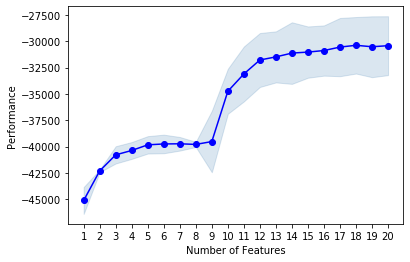

In [23]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

plt.figure(figsize=(16, 6))
plt_sfs(sfs1.get_metric_dict(), kind='std_dev')

In [27]:
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=.9)).T['feature_names'].values[-1]

('Neighborhood',
 'BldgType',
 'CentralAir',
 'ScreenPorch',
 'diff_YearBuilt_YrSold',
 'diff_YearRemodAdd_YearBuilt',
 'diff_YearRemodAdd_YrSold',
 'diff_GarageYrBlt_YrSold',
 'log_TotalBsmtSF',
 'sqrt_LotArea',
 'sqrt_BsmtFinSF1',
 'sqrt_GrLivArea',
 'sqrt_EnclosedPorch',
 'sqrt_3SsnPorch',
 'sqrt_ScreenPorch',
 'freq_CentralAir',
 'freq_LandSlope',
 'freq_OverallQual',
 'freq_Fireplaces',
 'freq_GarageCars')

# Dimensionality Reduction: